# Generate figures for report

This notebook was used to generate the figures in our final M2R report.

In [55]:
import pandas as pd
import numpy as np
from preprocessing import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib.ticker import FuncFormatter
import scipy.optimize as op
plt.style.use("ggplot") # Config plots for dark mode, delete if on light mode
plt.rcParams['figure.dpi'] = 150 # Hi-res plots

## Preprocessing the data

First, we read the data, starting with the model parameters:

In [44]:
M1_parameters = pd.read_csv("../data/parameters/M1_train_params.csv", index_col=0)
M2_parameters = pd.read_csv("../data/parameters/M2_train_params.csv", index_col=0)
M3_parameters = pd.read_csv("../data/parameters/M3_train_params.csv", index_col=0)
M4_parameters = pd.read_csv("../data/parameters/M4_train_params.csv", index_col=0)

We check they have been loaded properly:

In [45]:
M1_parameters.head()

,lambda
1,0.084551
2,0.289621
3,0.081880
4,0.102127
5,0.306386


In [46]:
M2_parameters.head()

,alpha,beta,lambda
1,0.014106,0.023018,0.005462
2,0.021212,0.023021,0.003802
3,0.019415,0.027979,0.004185
4,0.226693,0.942690,0.012930
5,0.022903,0.026077,0.006239


In [47]:
M3_parameters.head()

,alpha,beta,lambda
1,0.020179,0.035553,7.705058e-03
2,0.015271,0.016036,1.213006e-03
3,0.004644,0.004644,3.779973e-17
4,0.009820,0.023543,9.676464e-03
5,0.011876,0.012869,1.258996e-03


In [48]:
M4_parameters.head()

,lambda,alpha,alpha_prime,beta,beta_prime
1,0.004289,0.013056,0.017923,0.031378,0.051294
2,0.000957,0.185765,0.012679,1.004565,0.016323
3,0.000042,0.039154,0.003156,0.099732,0.005210
4,0.007390,0.229210,0.007624,1.002632,0.023494
5,0.001123,0.135349,0.009782,0.695608,0.013202


And now we read the p-values:

In [49]:
M1_p_values = pd.read_csv("../data/p_values/M1_p_values.csv", index_col=0)
M2_p_values = pd.read_csv("../data/p_values/M2_p_values.csv", index_col=0)
M3_p_values = pd.read_csv("../data/p_values/M3_p_values.csv", index_col=0)
M4_p_values = pd.read_csv("../data/p_values/M4_p_values.csv", index_col=0)

We define a helper function to convert the dataframes into dicts with keys being the station ID and the value being the p-value array:

In [50]:
def df_to_numpy_dict(dataframe):
    numpy_dict = {}
    for index in dataframe.index:
        numpy_dict[index] = dataframe.loc[index].to_numpy()
    return numpy_dict

Convert all the dataframes into dicts:

In [51]:
M1_p_value_dict = df_to_numpy_dict(M1_p_values)
M2_p_value_dict = df_to_numpy_dict(M2_p_values)
M3_p_value_dict = df_to_numpy_dict(M3_p_values)
M4_p_value_dict = df_to_numpy_dict(M4_p_values)

And we compute the Kolomogorov-Smirnov test-statistic for each p-value for all the stations of a given model; we start by defining a helper function:

In [52]:
def kol_smir_dict(p_value_dict):
    kol_smir_test = {}
    for station_id, pvals in p_value_dict.items():
        kol_smir_test[station_id] = st.kstest(pvals, "uniform").statistic
    return kol_smir_test

And we now apply it to all of the dicts:

In [53]:
M1_ks_dict = kol_smir_dict(M1_p_value_dict)
M2_ks_dict = kol_smir_dict(M2_p_value_dict)
M3_ks_dict = kol_smir_dict(M3_p_value_dict)
M4_ks_dict = kol_smir_dict(M4_p_value_dict)

In [69]:
def join_p_values(p_value_dict):
    return np.concatenate(np.array(list(p_value_dict.values()), dtype=object))

In [70]:
M1_joined_p_values_dict = join_p_values(M1_p_value_dict)
M2_joined_p_values_dict = join_p_values(M2_p_value_dict)
M3_joined_p_values_dict = join_p_values(M3_p_value_dict)
M4_joined_p_values_dict = join_p_values(M4_p_value_dict)

And now we have all we need to start making the figures

## Making the figures

We start by making a plot of the p-value histograms for all models, using ´plt.subplot´

In [57]:
def lblFormat(n, pos):
    return str(int(n / 1e3))
def lblFormat(n, pos):
    return str(int(n / 1e3))
lblFormatter = FuncFormatter(lblFormat)

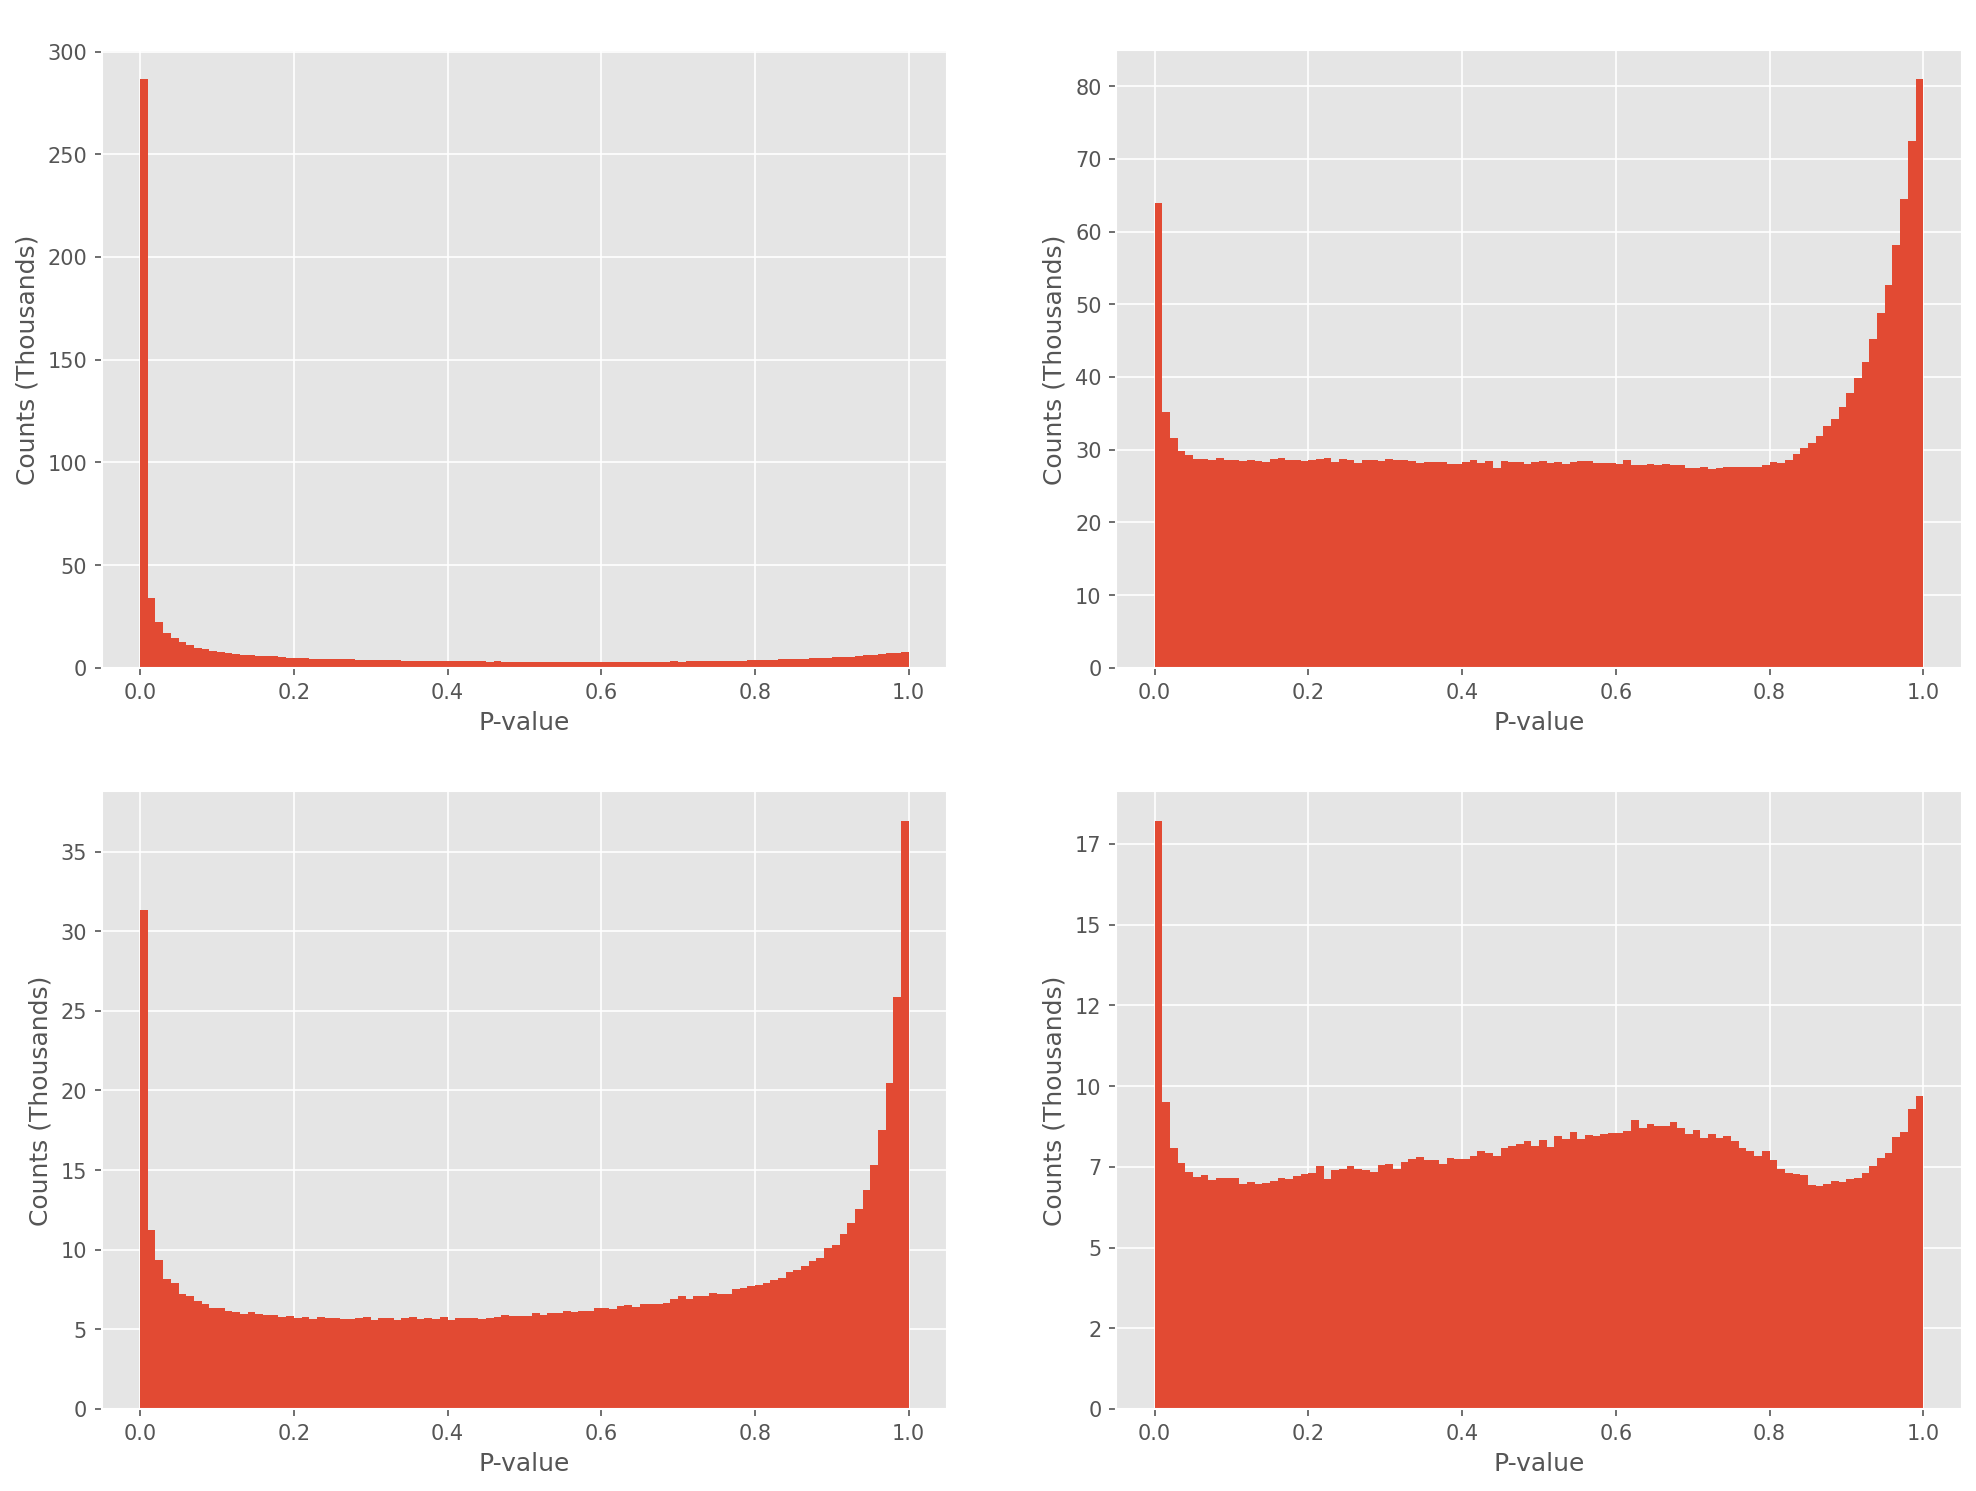

In [81]:
plt.rc('font', size=10) 
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
n, bins, patches = plt.hist(M1_joined_p_values_dict, bins=100)
plt.title("Histogram of p-values for Model 1")
ax = plt.gca()
ax.yaxis.set_major_formatter(lblFormatter)
plt.xlabel("P-value")
plt.ylabel("Counts (Thousands)")
plt.subplot(2,2,2)
n, bins, patches = plt.hist(M2_joined_p_values_dict, bins=100)
ax = plt.gca()
ax.yaxis.set_major_formatter(lblFormatter)
plt.title("Histogram of p-values for Model 2")
plt.xlabel("P-value")
plt.ylabel("Counts (Thousands)")
plt.subplot(2,2,3)
n, bins, patches = plt.hist(M3_joined_p_values_dict, bins=100)
ax = plt.gca()
ax.yaxis.set_major_formatter(lblFormatter)
plt.title("Histogram of p-values for Model 3")
plt.xlabel("P-value")
plt.ylabel("Counts (Thousands)")
plt.subplot(2,2,4)
n, bins, patches = plt.hist(M4_joined_p_values_dict, bins=100)
ax = plt.gca()
ax.yaxis.set_major_formatter(lblFormatter)
plt.title("Histogram of p-values for Model 4")
plt.xlabel("P-value")
plt.ylabel("Counts (Thousands)")
plt.show()
